In [77]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError
import sounddevice as sd

fs = 48000

duration = 3  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)

sd.default.samplerate = fs
sd.default.channels = 1

myrecording = sd.rec(int(duration * fs))


sd.wait()

print(myrecording)

[[0.00155697]
 [0.00093641]
 [0.00141946]
 ...
 [0.00542025]
 [0.00486583]
 [0.00431073]]


In [78]:
sd.play(myrecording, samplerate=None, mapping=None, blocking=False, loop=False)

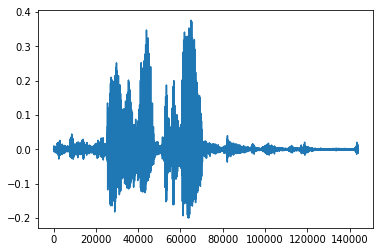

In [79]:
plt.plot(myrecording)

In [80]:
X = np.fft.fft(myrecording, axis=0)
X

array([[-0.03077358+0.j        ],
       [-0.03628415+0.01599056j],
       [ 0.02738073+0.02896933j],
       ...,
       [ 0.00102603+0.01994148j],
       [ 0.02738073-0.02896933j],
       [-0.03628415-0.01599056j]], dtype=complex64)

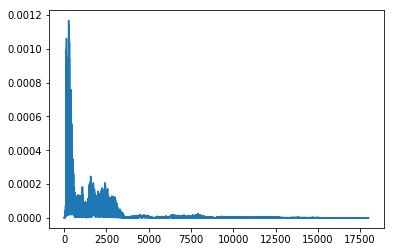

In [81]:
X = np.abs(X)

fmax = 18000
nmax = int(len(X) * fmax / fs)

X = X[:nmax]
X = X / sum(X)
f = np.linspace(0, fmax, nmax)
plt.plot(f, X)

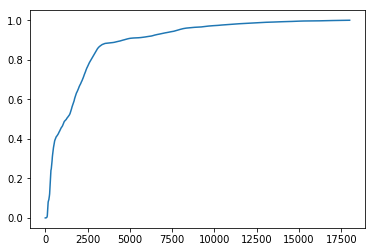

In [82]:
cX = np.cumsum(X)
plt.plot(f, cX)